# Create and visualize an empty frame mask for the waymo scenarios

In [2]:
import os
import math
import numpy as np
import itertools

from tqdm import tqdm

from ad_config_search.waymo_utils import *

from pathlib import Path

import matplotlib.pyplot as plt

import pandas as pd

import seaborn as sns

import pickle

%load_ext autoreload
%autoreload 2

In [2]:
tfrecord_paths = list(Path("/data/ges/waymo").glob("*/*.tfrecord"))

In [3]:
empty_frame_mask = {}
for p in tqdm(tfrecord_paths):
    scenario_name = p.parent.stem+"-"+p.stem.replace("_", "")
    bboxes = collect_bboxes(frames_from_path(p))
    empty_frame_mask[scenario_name] = [frame == {} for frame in bboxes]

100%|██████████| 273/273 [08:10<00:00,  1.80s/it]


In [9]:
max([len(m) for m in empty_frame_mask.values()])

200

In [7]:
with open("empty_frame_mask.pl", 'wb') as f:
    pickle.dump(empty_frame_mask, f)

In [5]:
# pad empty frame mask with -1s to get unfirom 200 length
empty_frame_mask_rect = np.array([np.pad(np.array(v).astype(int), (0, 200-len(v)), constant_values=-1) for v in empty_frame_mask.values()])

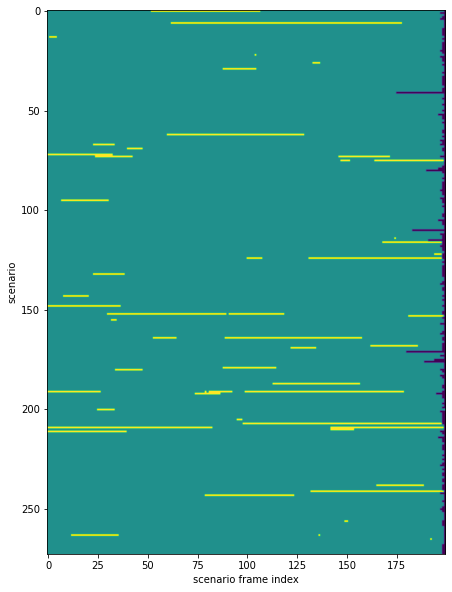

In [6]:
# dark represents no frame
# green represents frame with obstacles
# yellow represents frame with no obstacles
plt.figure(figsize=(10, 10))
plt.ylabel("scenario")
plt.xlabel("scenario frame index")
plt.imshow(empty_frame_mask_rect)

In [12]:
# fraction empty frames in the dataset
np.sum([np.sum(x) for x in empty_frame_mask.values()]) / np.sum([len(x) for x in empty_frame_mask.values()])

0.028047065788499963

In [9]:
# fraction of scenarios with any empty frames in the dataset
np.sum([np.any(x) for x in empty_frame_mask.values()]) / len(empty_frame_mask.values())

0.1575091575091575

In [11]:
# fraction of scenarios with more than 10% frames empty
np.sum([np.sum(x) / len(x) > 0.1 for x in empty_frame_mask.values()]) / len(empty_frame_mask.values())

0.08424908424908426